## Goals
Finde heraus was der Unterschied zwischen der kontaminierten Platte und den anderen Platten ist.
Ist es moeglich auf Grund von Einflussfaktoren vorherzusagen bei welcher Platte etwas schiefgehen wird?
Man kann die Aufgabe als Klassifikationsaufgabe sehen (Kontaminierte Platte, Nicht kontaminierte Platte)

## Ziele prepocessing
### Allgemein
1. Ueberblick der Datan bekommen
2. metadaten auf seqdaten matchen

### Spezifisch
1. Vorauswahl der interessanten Variablen fuer unsere Fragestellung
2. Deskriptive Statistik und Data Cleaning der relevanten Daten

In [51]:
# import packages

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


In [52]:
# read data
df =  pd.read_table('../data/seqtab_nobimera_idtaxa.tsv')
backup_df = pd.read_table("../data/seqtab_nobimera_idtaxa.tsv")
meta_data = pd.read_csv('../data/meta_data_notes_renamed.csv')

# look at data
print("Shape:")
print(df.shape)
df.head()


meta_data.shape
df.head()

Shape:
(1564, 202)


,otu,seq,tax,100A_FGCZ,100B_FGCZ,101A_FGCZ,101B_FGCZ,103A_FGCZ,103B_FGCZ,106A_FGCZ,...,S56_FGCZ,S57_FGCZ,S58_FGCZ,S59_FGCZ,S5_FGCZ,S60_FGCZ,S6_FGCZ,S7_FGCZ,S8_FGCZ,S9_FGCZ
0,otu1,TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTG...,rootrank;Root;62.12|domain;Bacteria;62.12|phyl...,121182,51332,47276,35653,90972,102606,16194,...,186059,19920,7968,19795,45039,27010,137810,133570,56850,95439
1,otu2,TACGTAGGTGGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGCGCG...,rootrank;Root;100|domain;Bacteria;100|phylum;F...,0,0,250,0,962,244,1260,...,0,0,0,0,0,0,0,1,1,5
2,otu3,TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTG...,rootrank;Root;72.8|domain;Bacteria;72.8|phylum...,9921,5047,27034,25285,1765,96048,15450,...,20674,5047,7183,36104,15009,7546,16363,2750,2283,3837
3,otu4,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAG...,rootrank;Root;98.27|domain;Bacteria;98.27|phyl...,1351,97217,917,145,93,448,355,...,193,109,246,39,545,96,407,192,387,305
4,otu5,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAG...,rootrank;Root;100|domain;Bacteria;100|phylum;F...,65360,245,32350,41464,188,233,59819,...,47205,5384,7789,3516,3778,4517,7458,22981,13943,7919


In [53]:
#look at meta data
print("Shape")
print(meta_data.shape)
meta_data.head()

Shape
(199, 61)


,Rearing_LAB,Sample_ID,Sex,Age_weeks,Animals_for,cage_ID,BOX,Position,sample_type,extraction_date,...,housing_room_condition,Ventilation_system,tail_handling,BW_g,BW1_g,BW2_g,BW3_g,BW4_g,BW5_g,Notes
0,LAB_1,S1,F,8.0,micro_control,1HF8,1.0,1.0,primary,7/5/2020,...,mixed_sex,room_air_change,yes,19.7,NaN,NaN,NaN,NaN,NaN,NaN
1,LAB_1,S2,F,8.0,micro_control,1HF3,1.0,2.0,primary,7/5/2020,...,mixed_sex,room_air_change,yes,17.2,NaN,NaN,NaN,NaN,NaN,sample blocked the column membrane
2,LAB_1,S3,F,8.0,micro_control,1HF5,1.0,3.0,primary,7/5/2020,...,mixed_sex,room_air_change,yes,19.1,NaN,NaN,NaN,NaN,NaN,NaN
3,LAB_1,S4,F,8.0,micro_control,1HF11,1.0,4.0,primary,7/5/2020,...,mixed_sex,room_air_change,yes,17.8,NaN,NaN,NaN,NaN,NaN,NaN
4,LAB_1,S5,F,8.0,micro_control,1HF9,1.0,5.0,primary,7/5/2020,...,mixed_sex,room_air_change,yes,19.5,NaN,NaN,NaN,NaN,NaN,NaN


## Bring Data to matching Format

in this we bring the meta data to the same format as the data
Herefore we delete the suffix of the sample id in the seq data to have the raw sample id
Furthermore, we use the sample id as column names for the meta data

### Sorting and checking
Finally, we bring the columns in the same order and check if all the column names match
This was not the case so we try to find out why they are not matching in the next step

In [54]:
# transform meta data to match format of seq data


meta_data.rename(index = meta_data.iloc[:,1], inplace = True)
meta_data = meta_data.drop(meta_data.columns[[1]], axis=1) # drop sample id
meta_data.head()
meta_data.dtypes

Rearing_LAB                    object
Sex                            object
Age_weeks                     float64
Animals_for                    object
cage_ID                        object
BOX                           float64
Position                      float64
sample_type                    object
extraction_date                object
extraction_run                float64
extracted_by                   object
DNA_elution_Vol_ul            float64
Quantification_method          object
DNA_conc_ng_ul                float64
260 / 280                     float64
230 / 260                     float64
Vol_25ng_ul                   float64
Vol_H2O                       float64
16S_PCR_date                   object
PCR_plate                       int64
PCR_row                        object
PCR_position                    int64
library_conc_ng_ul            float64
FA_kit_used                    object
repeat_library_prep            object
library_prep_attempt            int64
Use_for_pool

In [55]:
meta_data.head()

,Rearing_LAB,Sex,Age_weeks,Animals_for,cage_ID,BOX,Position,sample_type,extraction_date,extraction_run,...,housing_room_condition,Ventilation_system,tail_handling,BW_g,BW1_g,BW2_g,BW3_g,BW4_g,BW5_g,Notes
S1,LAB_1,F,8.0,micro_control,1HF8,1.0,1.0,primary,7/5/2020,1.0,...,mixed_sex,room_air_change,yes,19.7,NaN,NaN,NaN,NaN,NaN,NaN
S2,LAB_1,F,8.0,micro_control,1HF3,1.0,2.0,primary,7/5/2020,1.0,...,mixed_sex,room_air_change,yes,17.2,NaN,NaN,NaN,NaN,NaN,sample blocked the column membrane
S3,LAB_1,F,8.0,micro_control,1HF5,1.0,3.0,primary,7/5/2020,1.0,...,mixed_sex,room_air_change,yes,19.1,NaN,NaN,NaN,NaN,NaN,NaN
S4,LAB_1,F,8.0,micro_control,1HF11,1.0,4.0,primary,7/5/2020,1.0,...,mixed_sex,room_air_change,yes,17.8,NaN,NaN,NaN,NaN,NaN,NaN
S5,LAB_1,F,8.0,micro_control,1HF9,1.0,5.0,primary,7/5/2020,1.0,...,mixed_sex,room_air_change,yes,19.5,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# removing non numeric columns and save to extra df
df_otu_seq_tax = df[["otu", "seq", "tax"]]
df = df.drop(columns=["otu", "seq", "tax"])
df.head()
df_otu_seq_tax.head()

,otu,seq,tax
0,otu1,TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTG...,rootrank;Root;62.12|domain;Bacteria;62.12|phyl...
1,otu2,TACGTAGGTGGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGCGCG...,rootrank;Root;100|domain;Bacteria;100|phylum;F...
2,otu3,TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTG...,rootrank;Root;72.8|domain;Bacteria;72.8|phylum...
3,otu4,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAG...,rootrank;Root;98.27|domain;Bacteria;98.27|phyl...
4,otu5,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAG...,rootrank;Root;100|domain;Bacteria;100|phylum;F...


In [57]:
df.shape

(1564, 199)

In [58]:
# rename sample names to match metadata

df.columns = df.columns.str.replace("_FGCZ","", regex=True)
# matching the colnames to have the same order between meta data and seq data
df = df.sort_index(axis=1)
meta_data = meta_data.sort_index(axis=0)


In [59]:

meta_data.head()

,Rearing_LAB,Sex,Age_weeks,Animals_for,cage_ID,BOX,Position,sample_type,extraction_date,extraction_run,...,housing_room_condition,Ventilation_system,tail_handling,BW_g,BW1_g,BW2_g,BW3_g,BW4_g,BW5_g,Notes
100A,LAB_3,F,14.0,behaviour,BF4,3.0,17.0,primary,29/5/2020,15.0,...,single_sex,room_ventilation,no,NaN,19.1,20.5,20.3,21.1,21.8,NaN
100B,LAB_3,F,14.0,gene_expr,BF4,2.0,17.0,primary,14/5/2020,8.0,...,single_sex,room_ventilation,no,NaN,19.2,20.7,21.1,22.2,23.4,NaN
101A,LAB_4,F,14.0,gene_expr,MF7,2.0,23.0,primary,14/5/2020,8.0,...,mixed_sex,room_ventilation,yes,NaN,17.0,20.1,19.9,19.8,21.1,NaN
101B,LAB_4,F,14.0,behaviour,MF7,3.0,23.0,primary,2/6/2020,16.0,...,mixed_sex,room_ventilation,yes,NaN,15.5,17.8,18.0,18.5,18.9,NaN
103A,LAB_4,F,14.0,behaviour,MF2,3.0,19.0,primary,2/6/2020,16.0,...,mixed_sex,room_ventilation,yes,NaN,16.0,18.4,18.3,17.9,19.1,NaN


In [60]:
df.head()

,100A,100B,101A,101B,103A,103B,106A,106B,107A,107B,...,S55,S56,S57,S58,S59,S6,S60,S7,S8,S9
0,121182,51332,47276,35653,90972,102606,16194,30891,86599,31243,...,36067,186059,19920,7968,19795,137810,27010,133570,56850,95439
1,0,0,250,0,962,244,1260,0,0,155,...,1021,0,0,0,0,0,0,1,1,5
2,9921,5047,27034,25285,1765,96048,15450,31604,28757,11942,...,11164,20674,5047,7183,36104,16363,7546,2750,2283,3837
3,1351,97217,917,145,93,448,355,1088,1247,51122,...,245,193,109,246,39,407,96,192,387,305
4,65360,245,32350,41464,188,233,59819,52998,12795,2597,...,15072,47205,5384,7789,3516,7458,4517,22981,13943,7919


In [61]:
meta_data.shape

(199, 60)

## Format modification
The first steps showed that it is more convienent to have tha samples as rows and the features as columns, because of that we will transpose the data frames

In [62]:
# transpose 
df = df.transpose()
df.head()




,0,1,2,3,4,5,6,7,8,9,...,1554,1555,1556,1557,1558,1559,1560,1561,1562,1563
100A,121182,0,9921,1351,65360,24331,3858,15493,373,1911,...,0,0,0,0,0,0,0,0,0,0
100B,51332,0,5047,97217,245,5078,1564,8653,2739,2879,...,0,0,0,0,0,0,0,0,0,0
101A,47276,250,27034,917,32350,11503,6836,26665,9471,286,...,0,0,0,0,0,0,0,0,0,0
101B,35653,0,25285,145,41464,16648,4978,20689,8220,281,...,0,0,0,0,0,0,0,0,0,0
103A,90972,962,1765,93,188,16078,12066,20746,15073,38305,...,0,0,0,0,0,0,0,0,0,0


## Adding count data do metadata
We hypothize that counts are not relevant to our research question. Nevertheless, we want to include that information therefore, we add the count median of each sample as a colum in the metadata

In [63]:
median_count = df.median(axis=1)
len(median_count)
meta_data["median_count"] = median_count

In [64]:
meta_data.shape

(199, 61)

In [65]:
df.shape
df.shape
meta_data.shape
df.shape
matching = df.transpose().columns == meta_data.transpose().columns
matching


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [68]:
meta_data.head()
# saving meta data with matched sample names
meta_data.to_csv("../data/output/whole_preprocessed_meta_data")

## Explorative Data Analyse
Now that we have a first very rough overview of the data, we look at the scale of the data (numeric, ordinal, etc), missing values



In [17]:
# data types metadata
print("Data Types MetaData")
meta_data.dtypes


Data Types MetaData


Rearing_LAB      object
Sex              object
Age_weeks       float64
Animals_for      object
cage_ID          object
                 ...   
BW3_g           float64
BW4_g           float64
BW5_g           float64
Notes            object
median_count    float64
Length: 61, dtype: object

In [18]:
# Check taxonomy
df_otu_seq_tax.tax[1].split(';')

['rootrank',
 'Root',
 '100|domain',
 'Bacteria',
 '100|phylum',
 'Firmicutes',
 '100|class',
 'Bacilli',
 '100|order',
 'Lactobacillales',
 '92.62|family',
 'Listeriaceae',
 '89.91|genus',
 'Listeria',
 '89.91']

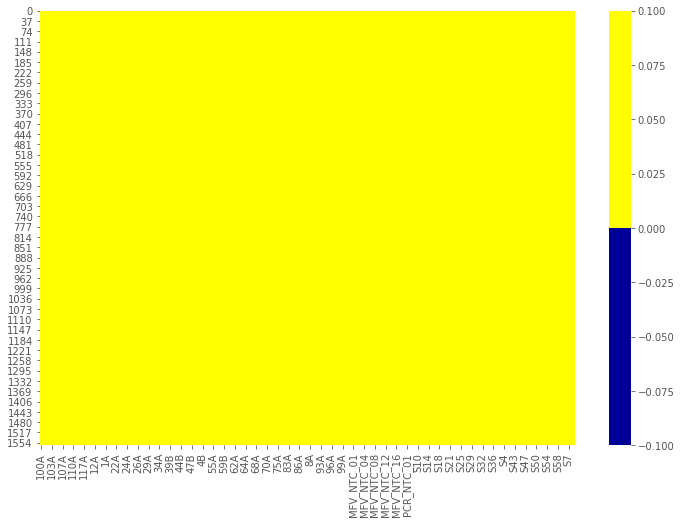

In [19]:
# Check for missing values visually in seq data
colours = ['#000099', '#ffff00']
sns.heatmap(df.transpose().isnull(),cmap = sns.color_palette(colours))

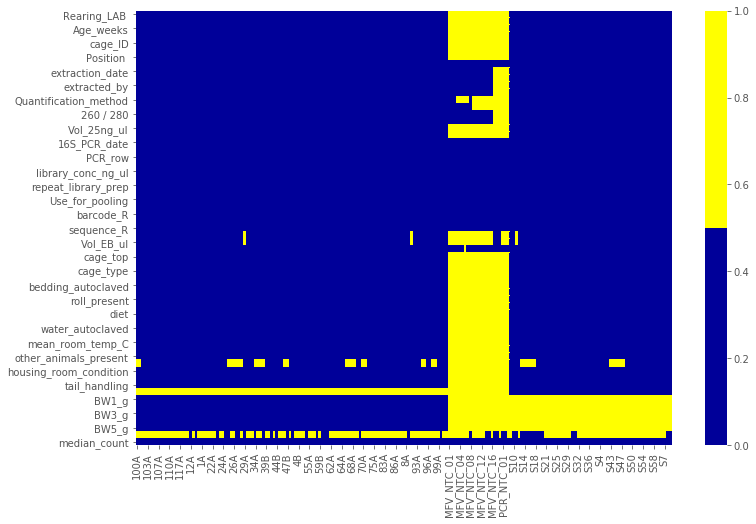

In [20]:
# Check for missing values visually
colours = ['#000099', '#ffff00']
sns.heatmap(meta_data.transpose().isnull(),cmap = sns.color_palette(colours))

In [21]:
def missing_values(data_frame):
    for col in data_frame.columns:
        pct_missing = np.mean(data_frame[col].isnull())
        if pct_missing >0 :
            print('{} - {}'.format(col, round(pct_missing * 100)))

## TODO
Predecide which feature are useful for our case and remove the useless feature
Then deal with missing values of the useful values and bring them into good format

In [22]:
#Drop irrelevnt columns
ir_cols = pd.read_csv("../data/irrelevant_cols.csv")
ir_cols.head()
for col in ir_cols.columns:
    meta_data = meta_data.drop(columns = [col])
    print(col)

Sex
Animals_for 
cage_ID
BOX 
Position 
Vol_25ng_ul
Vol_H2O
barcode_F
barcode_R
sequence_F
sequence_R
cage_top
Ventilation_system
BW_g
BW1_g
BW2_g
BW3_g
BW4_g
BW5_g


In [23]:
meta_data.shape

(199, 42)

## Data Formating and Cleaning
Now that I have dropped non relevant features and have the seq data and the meta data in the same format, I will deal with missing values, outliers and non-numeric features. The result of this process should be a dataframe that is suited for machine learnign libraries

In [24]:
# Check again for missing values in new meta data
missing_values(meta_data)

Rearing_LAB  - 12
Age_weeks - 12
extraction_date - 3
extraction_run - 3
extracted_by - 3
DNA_elution_Vol_ul - 3
Quantification_method - 10
DNA_conc_ng_ul - 7
260 / 280 - 3
230 / 260 - 3
Dilution_factor - 12
Vol_EB_ul - 12
Vol_DNA_ul - 1
light_cycle - 12
cage_type - 12
bedding_material - 12
bedding_autoclaved - 12
house_present - 12
roll_present - 12
enrichment_autoclaved - 12
diet - 12
diet_treatment - 12
water_autoclaved - 12
water_chlorinated - 12
mean_room_temp_C - 12
room_humidity - 12
other_animals_present - 12
other_animals_present_kind - 30
housing_room_condition - 12
tail_handling - 12
Notes - 78


## Removing missing values
I decided to replace the missing notes with a zero as well as missing information about the kind of ohter animals present. These variables are categorial anyway, so I just add the category no value encoded with a zero to it.

The other columns had only 12 missing observation which missed mainly for the same samples, so I decided that I won't use too much data if I just delete this samples.

In [25]:
meta_data.Notes.fillna(0, inplace=True)

In [26]:
meta_data.other_animals_present_kind.fillna(0,inplace=True)

In [27]:
meta_data_nona = meta_data.dropna()

In [28]:
meta_data_nona.shape

(173, 42)

## Deciding how to deal with non numercial values
In order to decide how to deal with non numerical values, I print the value count of every columns that is non numerical. By that I want to see how many different categories of the feature exist. Based on that I can decide wheter I use one hot encoding or a custom encoding

In [29]:
i = 0
object_cols = []
for dtype in meta_data_nona.dtypes:
    
    if str(dtype) == "object":
        object_cols.append(meta_data_nona.columns[i])
#         print(meta_data_nona.iloc[1,i])
        print(meta_data_nona.iloc[:,i].value_counts())
        print("\n")
       
    i = i + 1

LAB_5    36
LAB_3    36
LAB_1    36
LAB_4    33
LAB_2    32
Name: Rearing_LAB , dtype: int64


primary    173
Name: sample_type, dtype: int64


14/5/2020    27
12/5/2020    19
7/5/2020     19
2/6/2020     18
29/5/2020    18
19/5/2020    16
5/6/2020     13
8/5/2020     11
4/6/2020      9
15/5/2020     9
11/5/2020     7
22/5/2020     7
Name: extraction_date, dtype: int64


SAH        84
MEC        78
MEC/SAH    11
Name: extracted_by, dtype: int64


QuantiFluor    89
Qubit          84
Name: Quantification_method, dtype: int64


17/06/2020    83
06/07/2020    79
08/07/2020    11
Name: 16S_PCR_date, dtype: int64


A    32
E    22
B    22
G    21
D    21
F    21
C    19
H    15
Name: PCR_row, dtype: int64


SS_NGS    94
HS_NGS    79
Name: FA_kit_used, dtype: int64


no    173
Name: repeat_library_prep, dtype: int64


reverse    105
normal      68
Name: light_cycle, dtype: int64


Makrolon_III    69
TYPE_II_L       36
2L              36
Typ22_Biosom    32
Name: cage_type, dtype: int64


popla

In [30]:
object_cols

['Rearing_LAB ',
 'sample_type',
 'extraction_date',
 'extracted_by',
 'Quantification_method',
 '16S_PCR_date',
 'PCR_row',
 'FA_kit_used',
 'repeat_library_prep',
 'light_cycle',
 'cage_type',
 'bedding_material',
 'bedding_autoclaved',
 'house_present',
 'roll_present',
 'enrichment_autoclaved',
 'diet',
 'diet_treatment',
 'water_autoclaved',
 'water_chlorinated',
 'mean_room_temp_C',
 'room_humidity',
 'other_animals_present',
 'other_animals_present_kind',
 'housing_room_condition',
 'tail_handling',
 'Notes']

In [31]:
# Logic for one hot encoding

def one_hot(dataframe, cols):
    for col in cols:
        print(col)
        temp = pd.get_dummies(dataframe.loc[:,col])
        dataframe.drop(columns=[col])
        result = pd.concat([temp, dataframe], axis=1)
    return result
#     print(dataframe.head())

In [32]:
test = meta_data_nona
var = "PCR_plate"
pd.get_dummies(test.loc[:,var])

,1,2,3
100A,0,1,0
100B,1,0,0
101A,1,0,0
101B,0,1,0
103A,0,1,0
...,...,...,...
S6,1,0,0
S60,1,0,0
S7,1,0,0
S8,1,0,0


In [33]:
res = one_hot(test, object_cols)

Rearing_LAB 
sample_type
extraction_date
extracted_by
Quantification_method
16S_PCR_date
PCR_row
FA_kit_used
repeat_library_prep
light_cycle
cage_type
bedding_material
bedding_autoclaved
house_present
roll_present
enrichment_autoclaved
diet
diet_treatment
water_autoclaved
water_chlorinated
mean_room_temp_C
room_humidity
other_animals_present
other_animals_present_kind
housing_room_condition
tail_handling
Notes


In [34]:
object_cols

['Rearing_LAB ',
 'sample_type',
 'extraction_date',
 'extracted_by',
 'Quantification_method',
 '16S_PCR_date',
 'PCR_row',
 'FA_kit_used',
 'repeat_library_prep',
 'light_cycle',
 'cage_type',
 'bedding_material',
 'bedding_autoclaved',
 'house_present',
 'roll_present',
 'enrichment_autoclaved',
 'diet',
 'diet_treatment',
 'water_autoclaved',
 'water_chlorinated',
 'mean_room_temp_C',
 'room_humidity',
 'other_animals_present',
 'other_animals_present_kind',
 'housing_room_condition',
 'tail_handling',
 'Notes']

In [35]:
res.dtypes

0                                               uint8
Tube labelled 12B; lower average DNA yield      uint8
Tube labelled 42A; lower average DNA yield      uint8
Tube labelled 5A                                uint8
Tube labelled 60B; lower average DNA yield      uint8
centrifuged twice                               uint8
extra centrifugation before AW1 buffer          uint8
labelled 60A?                                   uint8
lower average DNA yield                         uint8
sample blocked the column membrane              uint8
sample divided into 3 columns                   uint8
tubes cracked, some of the sample lost          uint8
Rearing_LAB                                    object
Age_weeks                                     float64
sample_type                                    object
extraction_date                                object
extraction_run                                float64
extracted_by                                   object
DNA_elution_Vol_ul          

In [36]:
res.head()


,0,Tube labelled 12B; lower average DNA yield,Tube labelled 42A; lower average DNA yield,Tube labelled 5A,Tube labelled 60B; lower average DNA yield,centrifuged twice,extra centrifugation before AW1 buffer,labelled 60A?,lower average DNA yield,sample blocked the column membrane,...,water_autoclaved,water_chlorinated,mean_room_temp_C,room_humidity,other_animals_present,other_animals_present_kind,housing_room_condition,tail_handling,Notes,median_count
100A,1,0,0,0,0,0,0,0,0,0,...,no,no,22,61,no,0,single_sex,no,0,0.0
100B,1,0,0,0,0,0,0,0,0,0,...,no,no,22,61,no,0,single_sex,no,0,0.0
101A,1,0,0,0,0,0,0,0,0,0,...,no,no,22,50-60,yes,"C57BL/6J, DBA/2N and Balb/c",mixed_sex,yes,0,0.0
101B,1,0,0,0,0,0,0,0,0,0,...,no,no,22,50-60,yes,"C57BL/6J, DBA/2N and Balb/c",mixed_sex,yes,0,0.0
103A,1,0,0,0,0,0,0,0,0,0,...,no,no,22,50-60,yes,"C57BL/6J, DBA/2N and Balb/c",mixed_sex,yes,0,0.0


In [37]:



def handle_non_numerical_data(df):
    columns = df.columns.values
    elem_dict = {}
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            #print(unique_elements)
            x = 0
            for unique in unique_elements:
#                 print(unique)
                if unique not in text_digit_vals:
#                     print(unique)
#                     print(x)
                    text_digit_vals[unique] = x
                    x+=1
            elem_dict[column] = text_digit_vals
            df[column] = list(map(convert_to_int, df[column]))
   
    return df, elem_dict


In [38]:
meta_data_nona.head()
test = meta_data_nona
res = handle_non_numerical_data(meta_data_nona)[0]

In [39]:
res.head()

,Rearing_LAB,Age_weeks,sample_type,extraction_date,extraction_run,extracted_by,DNA_elution_Vol_ul,Quantification_method,DNA_conc_ng_ul,260 / 280,...,water_autoclaved,water_chlorinated,mean_room_temp_C,room_humidity,other_animals_present,other_animals_present_kind,housing_room_condition,tail_handling,Notes,median_count
100A,3,14.0,0,7,15.0,2,160.0,0,254.00,1.91,...,1,1,0,0,1,0,0,1,0,0.0
100B,3,14.0,0,2,8.0,2,120.0,1,271.25,1.88,...,1,1,0,0,1,0,0,1,0,0.0
101A,0,14.0,0,2,8.0,2,120.0,1,257.20,1.89,...,1,1,0,3,0,1,1,0,0,0.0
101B,0,14.0,0,3,16.0,1,160.0,0,218.00,1.89,...,1,1,0,3,0,1,1,0,0,0.0
103A,0,14.0,0,3,16.0,1,160.0,0,312.00,1.90,...,1,1,0,3,0,1,1,0,0,0.0


In [40]:
meta_data_nona.head()

,Rearing_LAB,Age_weeks,sample_type,extraction_date,extraction_run,extracted_by,DNA_elution_Vol_ul,Quantification_method,DNA_conc_ng_ul,260 / 280,...,water_autoclaved,water_chlorinated,mean_room_temp_C,room_humidity,other_animals_present,other_animals_present_kind,housing_room_condition,tail_handling,Notes,median_count
100A,3,14.0,0,7,15.0,2,160.0,0,254.00,1.91,...,1,1,0,0,1,0,0,1,0,0.0
100B,3,14.0,0,2,8.0,2,120.0,1,271.25,1.88,...,1,1,0,0,1,0,0,1,0,0.0
101A,0,14.0,0,2,8.0,2,120.0,1,257.20,1.89,...,1,1,0,3,0,1,1,0,0,0.0
101B,0,14.0,0,3,16.0,1,160.0,0,218.00,1.89,...,1,1,0,3,0,1,1,0,0,0.0
103A,0,14.0,0,3,16.0,1,160.0,0,312.00,1.90,...,1,1,0,3,0,1,1,0,0,0.0


## Dealing with Outliers
In order to find outlieres, I look at boxplots of the features and descriptive statistic.


15


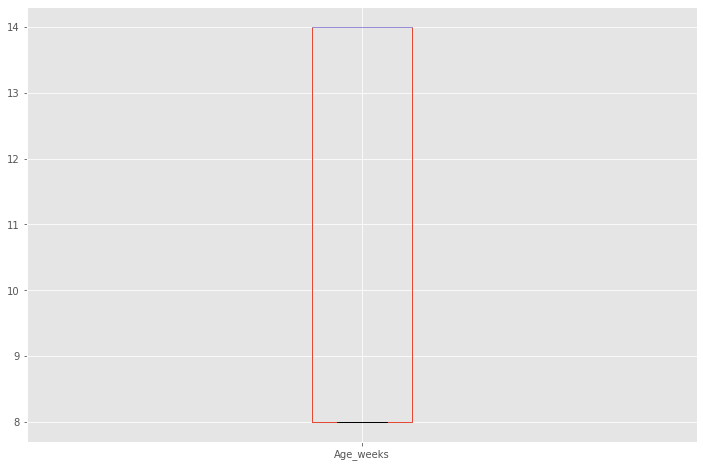

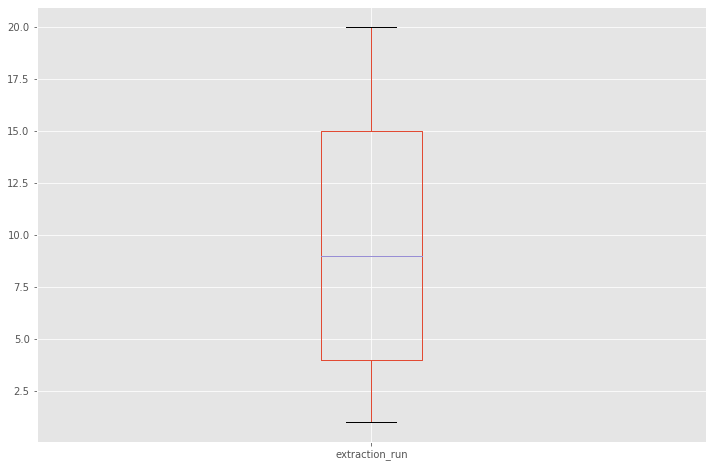

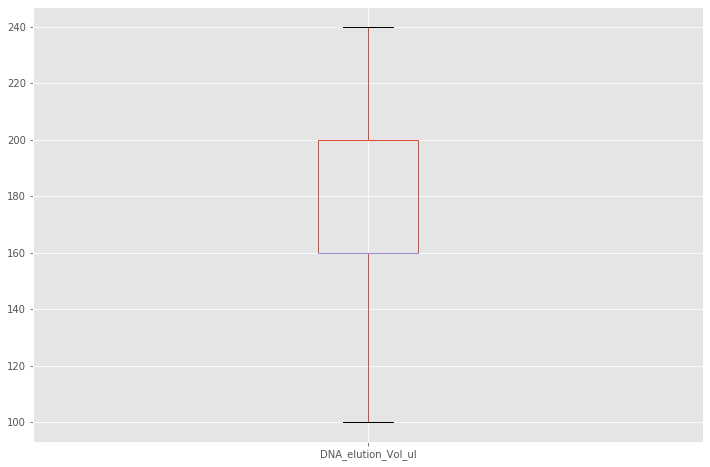

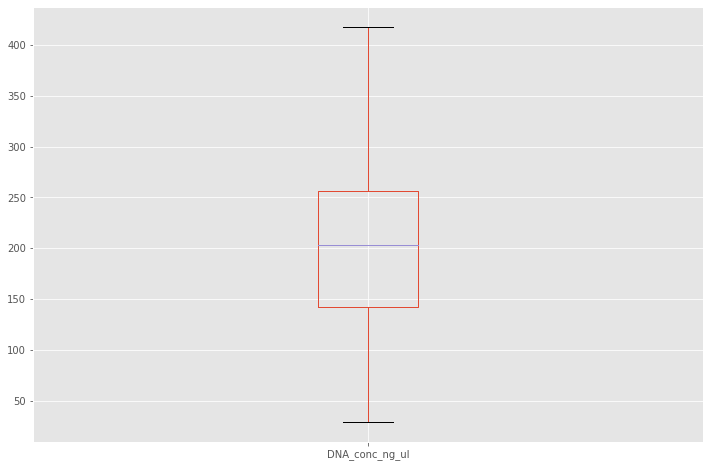

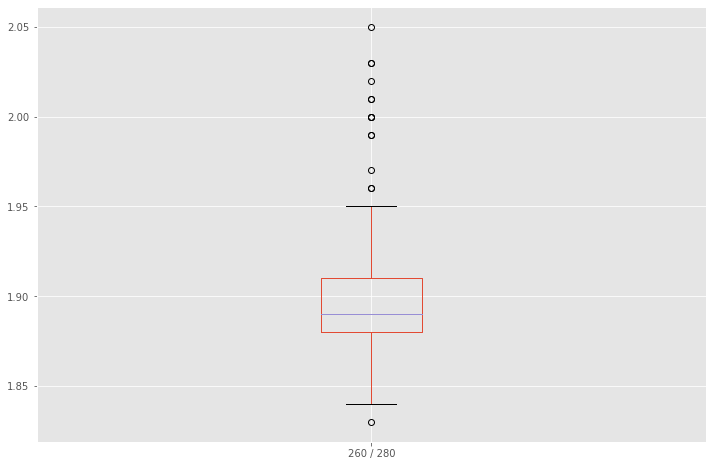

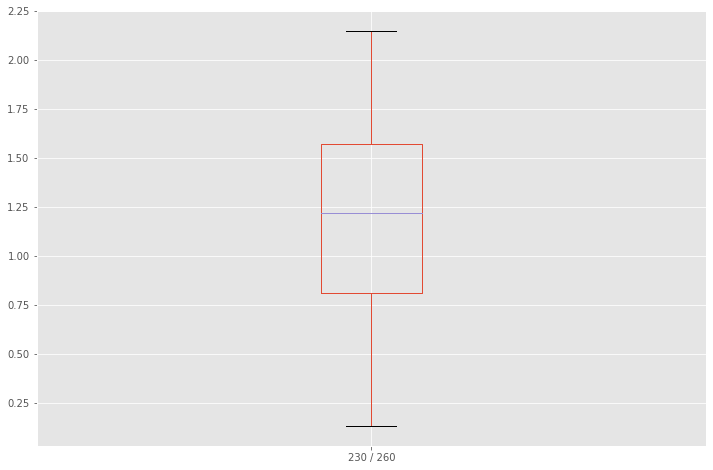

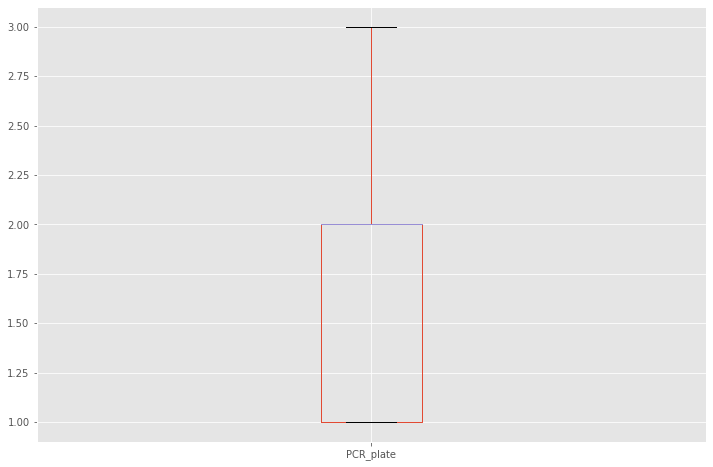

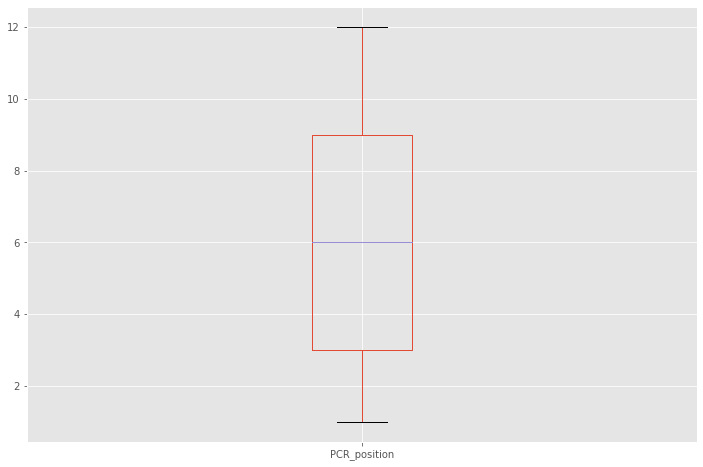

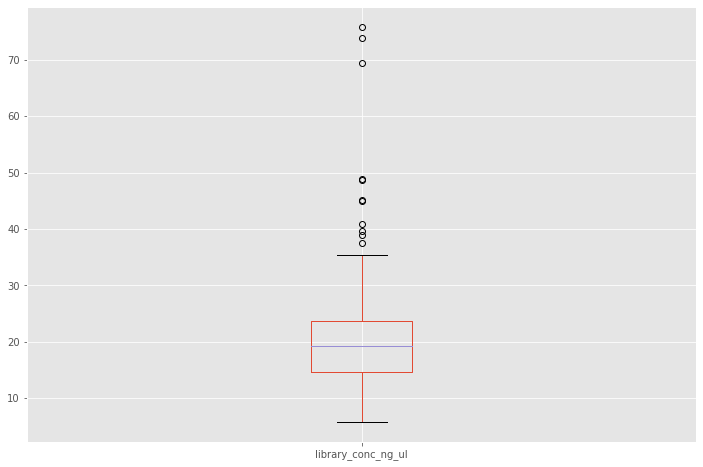

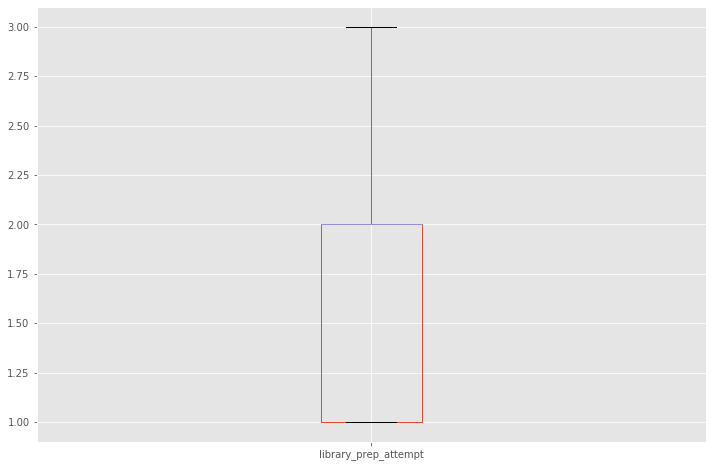

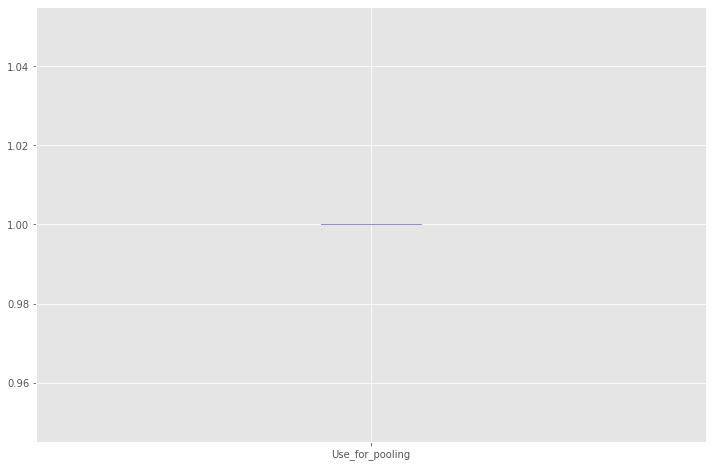

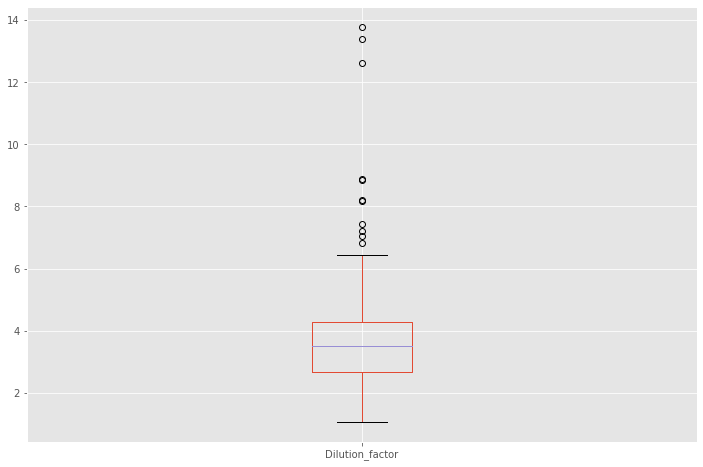

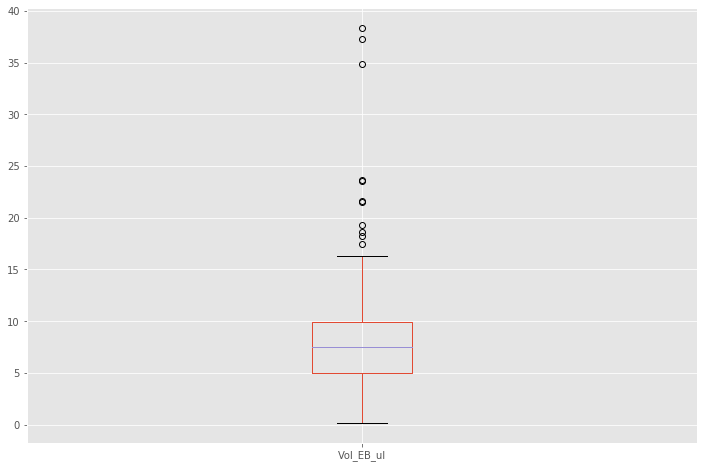

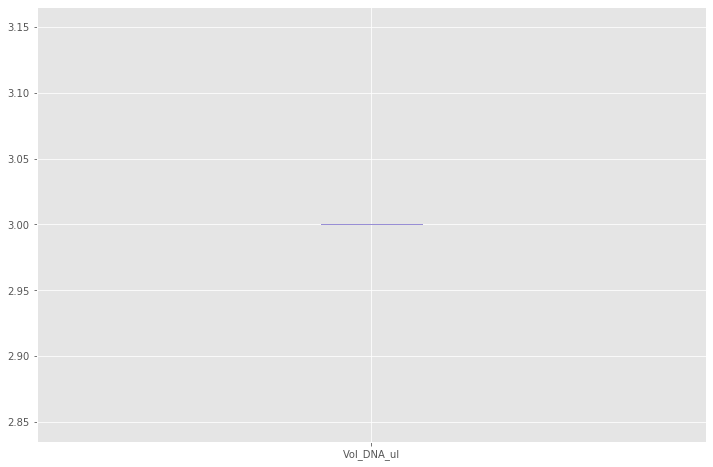

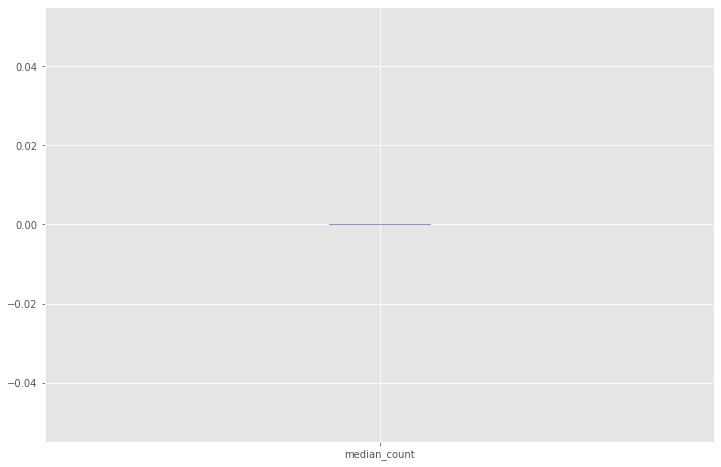

In [41]:
k = 0
for column in res:
    if not column in object_cols:
        k += 1

        plt.figure()
        res.boxplot([column])
print(k)


In [42]:

res.describe()

,Rearing_LAB,Age_weeks,sample_type,extraction_date,extraction_run,extracted_by,DNA_elution_Vol_ul,Quantification_method,DNA_conc_ng_ul,260 / 280,...,water_autoclaved,water_chlorinated,mean_room_temp_C,room_humidity,other_animals_present,other_animals_present_kind,housing_room_condition,tail_handling,Notes,median_count
count,173.000000,173.000000,173.0,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,...,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.0
mean,2.034682,11.953757,0.0,5.294798,9.502890,1.387283,160.346821,0.514451,199.517514,1.900462,...,0.398844,0.791908,1.202312,1.381503,0.208092,1.994220,0.791908,0.208092,1.144509,0.0
std,1.421987,2.852610,0.0,3.272476,6.049817,0.605460,32.095351,0.501242,84.799128,0.035745,...,0.491082,0.407122,1.176117,1.019635,0.407122,1.432582,0.407122,0.407122,2.819561,0.0
min,0.000000,8.000000,0.0,0.000000,1.000000,0.000000,100.000000,0.000000,28.800000,1.830000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.000000,8.000000,0.0,2.000000,4.000000,1.000000,160.000000,0.000000,142.000000,1.880000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0
50%,2.000000,14.000000,0.0,6.000000,9.000000,1.000000,160.000000,1.000000,202.820000,1.890000,...,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.0
75%,3.000000,14.000000,0.0,8.000000,15.000000,2.000000,200.000000,1.000000,255.900000,1.910000,...,1.000000,1.000000,2.000000,2.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.0
max,4.000000,14.000000,0.0,11.000000,20.000000,2.000000,240.000000,1.000000,418.000000,2.050000,...,1.000000,1.000000,3.000000,3.000000,1.000000,4.000000,1.000000,1.000000,11.000000,0.0


In [43]:
res.to_csv("../data/output/preprocessed_data.csv")


In [44]:
df.to_csv("../data/output/seqData.csv")
df_otu_seq_tax.to_csv("../data/output/otu_info.csv")

## Scaling count data
For ML methods that cannot deal with different scales

In [45]:
sc = StandardScaler()
scaled_array = sc.fit_transform(df)

In [46]:
scaled_features_df = pd.DataFrame(scaled_array, index=df.index, columns=df.columns)

In [47]:
scaled_features_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1554,1555,1556,1557,1558,1559,1560,1561,1562,1563
100A,0.729968,-0.100191,-0.440021,-0.304883,2.551715,1.115446,-0.631517,0.445695,-1.120625,-0.491787,...,-0.071067,-0.071067,-0.071067,-0.071067,-0.071067,-0.071067,-0.071067,-0.071067,-0.071067,-0.071067
100B,-0.483302,-0.100191,-0.755150,1.912452,-0.714284,-0.848154,-0.821193,-0.230996,-0.858223,-0.436028,...,-0.071067,-0.071067,-0.071067,-0.071067,-0.071067,-0.071067,-0.071067,-0.071067,-0.071067,-0.071067
101A,-0.553753,-0.099220,0.666423,-0.314921,0.896019,-0.192873,-0.385286,1.550958,-0.111611,-0.585391,...,-0.071067,-0.071067,-0.071067,-0.071067,-0.071067,-0.071067,-0.071067,-0.071067,-0.071067,-0.071067
101B,-0.755641,-0.100191,0.553341,-0.332777,1.353154,0.331862,-0.538912,0.959744,-0.250353,-0.585679,...,-0.071067,-0.071067,-0.071067,-0.071067,-0.071067,-0.071067,-0.071067,-0.071067,-0.071067,-0.071067
103A,0.205231,-0.096455,-0.967348,-0.333980,-0.717143,0.273729,0.047149,0.965383,0.509679,1.604591,...,-0.071067,-0.071067,-0.071067,-0.071067,-0.071067,-0.071067,-0.071067,-0.071067,-0.071067,-0.071067


In [48]:
# save scaled df
scaled_features_df.to_csv("../data/output/scaled_seq.csv")

In [49]:
res.shape

(173, 42)

In [50]:
df.shape

(199, 1564)